In [34]:
import numpy as np

import pandas as pd 
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,LabelEncoder,OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Missing value

In [35]:
raw_data=pd.read_csv("crx.data" , header=None , na_values="?")
cont_attr=[1,2,7,13,10,14]
dis_attr = [i for i in range(15) if i not in cont_attr]


In [36]:
for index in range(0,15):
    if index in cont_attr:
        _mean=raw_data[index].mean()
        raw_data[index]=raw_data[index].replace(math.nan, _mean)

    else:
        _mode=raw_data[index].mode()[0]
        raw_data[index]=raw_data[index].replace(math.nan,_mode)

raw_data.isna().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

# Normalize

In [37]:
values_normilized=raw_data[cont_attr].values
scaled=MinMaxScaler().fit_transform(values_normilized)
raw_data[cont_attr]=pd.DataFrame(scaled ,columns=cont_attr , index=raw_data.index)

raw_data


0         1         2  3  4   5   6         7  8  9         10 11 12  \
0    b  0.256842  0.000000  u  g   w   v  0.043860  t  t  0.014925  f  g   
1    a  0.675489  0.159286  u  g   q   h  0.106667  t  t  0.089552  f  g   
2    a  0.161654  0.017857  u  g   q   h  0.052632  t  f  0.000000  f  g   
3    b  0.211729  0.055000  u  g   w   v  0.131579  t  t  0.074627  t  g   
4    b  0.096541  0.200893  u  g   w   v  0.060000  t  f  0.000000  f  s   
..  ..       ...       ... .. ..  ..  ..       ... .. ..       ... .. ..   
685  b  0.110226  0.360179  y  p   e   h  0.043860  f  f  0.000000  f  g   
686  a  0.134135  0.026786  u  g   c   v  0.070175  f  t  0.029851  t  g   
687  a  0.172932  0.482143  y  p  ff  ff  0.070175  f  t  0.014925  t  g   
688  b  0.062707  0.007321  u  g  aa   v  0.001404  f  f  0.000000  f  g   
689  b  0.319549  0.120536  u  g   c   h  0.290877  f  f  0.000000  t  g   

         13       14 15  
0    0.1010  0.00000  +  
1    0.0215  0.00560  +  
2    0.1400  0.00824  +  
3    0.0500  0.00003  +  
4    0.0600  0.00000  +  
..      ...      ... ..  
685  0.1300  0.00000  -  
686  0.1000  0.00394  -  
687  0.1000  0.00001  -  
688  0.1400  0.00750  -  
689  0.0000  0.00000  -  

[690 rows x 16 columns]

# data categories

In [38]:
ord_15=OrdinalEncoder(dtype=np.int32)
raw_data[15]=ord_15.fit_transform(raw_data[[15]])
raw_data

0         1         2  3  4   5   6         7  8  9         10 11 12  \
0    b  0.256842  0.000000  u  g   w   v  0.043860  t  t  0.014925  f  g   
1    a  0.675489  0.159286  u  g   q   h  0.106667  t  t  0.089552  f  g   
2    a  0.161654  0.017857  u  g   q   h  0.052632  t  f  0.000000  f  g   
3    b  0.211729  0.055000  u  g   w   v  0.131579  t  t  0.074627  t  g   
4    b  0.096541  0.200893  u  g   w   v  0.060000  t  f  0.000000  f  s   
..  ..       ...       ... .. ..  ..  ..       ... .. ..       ... .. ..   
685  b  0.110226  0.360179  y  p   e   h  0.043860  f  f  0.000000  f  g   
686  a  0.134135  0.026786  u  g   c   v  0.070175  f  t  0.029851  t  g   
687  a  0.172932  0.482143  y  p  ff  ff  0.070175  f  t  0.014925  t  g   
688  b  0.062707  0.007321  u  g  aa   v  0.001404  f  f  0.000000  f  g   
689  b  0.319549  0.120536  u  g   c   h  0.290877  f  f  0.000000  t  g   

         13       14  15  
0    0.1010  0.00000   0  
1    0.0215  0.00560   0  
2    0.1400  0.00824   0  
3    0.0500  0.00003   0  
4    0.0600  0.00000   0  
..      ...      ...  ..  
685  0.1300  0.00000   1  
686  0.1000  0.00394   1  
687  0.1000  0.00001   1  
688  0.1400  0.00750   1  
689  0.0000  0.00000   1  

[690 rows x 16 columns]

In [39]:
"""
one_enc = OneHotEncoder(handle_unknown="ignore")
new_raw_data = one_enc.fit_transform(raw_data[dis_attr]).toarray()
dis_attr_names = [f'attr_{i}' for i in dis_attr]  # Generate string names for attributes
new_raw_data_df = pd.DataFrame(new_raw_data, columns=one_enc.get_feature_names_out(dis_attr_names))
new_raw_data_df.index = raw_data.index

# Drop the original discrete columns and concatenate the new one-hot encoded DataFrame with the original DataFrame
raw_data = raw_data.drop(dis_attr, axis=1)
result_data = pd.concat([new_raw_data_df, raw_data], axis=1)

# Output the result data
result_data
"""

one_hot=pd.get_dummies(raw_data[dis_attr] , dtype=int)
raw_data=raw_data.drop(dis_attr,axis=1)
result=raw_data.join(one_hot)
result

1         2         7        10      13       14  15  0_a  0_b  \
0    0.256842  0.000000  0.043860  0.014925  0.1010  0.00000   0    0    1   
1    0.675489  0.159286  0.106667  0.089552  0.0215  0.00560   0    1    0   
2    0.161654  0.017857  0.052632  0.000000  0.1400  0.00824   0    1    0   
3    0.211729  0.055000  0.131579  0.074627  0.0500  0.00003   0    0    1   
4    0.096541  0.200893  0.060000  0.000000  0.0600  0.00000   0    0    1   
..        ...       ...       ...       ...     ...      ...  ..  ...  ...   
685  0.110226  0.360179  0.043860  0.000000  0.1300  0.00000   1    0    1   
686  0.134135  0.026786  0.070175  0.029851  0.1000  0.00394   1    1    0   
687  0.172932  0.482143  0.070175  0.014925  0.1000  0.00001   1    1    0   
688  0.062707  0.007321  0.001404  0.000000  0.1400  0.00750   1    0    1   
689  0.319549  0.120536  0.290877  0.000000  0.0000  0.00000   1    0    1   

     3_l  ...  6_z  8_f  8_t  9_f  9_t  11_f  11_t  12_g  12_p  12_s  
0      0  ...    0    0    1    0    1     1     0     1     0     0  
1      0  ...    0    0    1    0    1     1     0     1     0     0  
2      0  ...    0    0    1    1    0     1     0     1     0     0  
3      0  ...    0    0    1    0    1     0     1     1     0     0  
4      0  ...    0    0    1    1    0     1     0     0     0     1  
..   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  
685    0  ...    0    1    0    1    0     1     0     1     0     0  
686    0  ...    0    1    0    0    1     0     1     1     0     0  
687    0  ...    0    1    0    0    1     0     1     1     0     0  
688    0  ...    0    1    0    1    0     1     0     1     0     0  
689    0  ...    0    1    0    1    0     0     1     1     0     0  

[690 rows x 47 columns]

# Test and train

In [40]:
Y=np.array(result.pop(15))
X=np.array(result)
print(X.shape,Y.shape)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_test.shape,X_train.shape)

(690, 46) (690,)
(138, 46) (552, 46)


0.8913043478260869


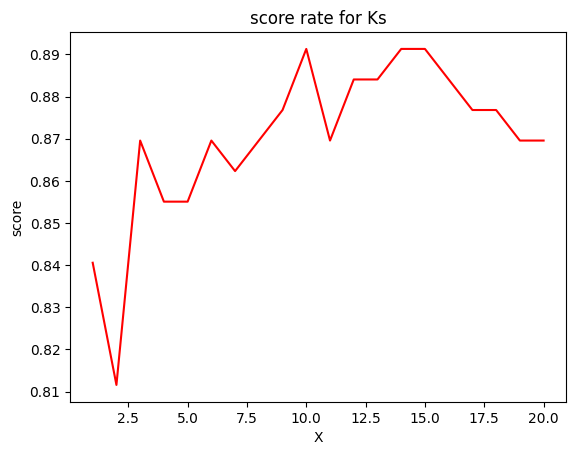

In [43]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)

score=knn.score(X_test,Y_test)
print(score)

list_of_scores=[]

for index in range(1,21):
    _knn=KNeighborsClassifier(n_neighbors=index)
    _knn.fit(X_train,Y_train)
    score=_knn.score(X_test,Y_test)
    list_of_scores.append(score)
    
plt.plot(list(range(1,21)),list_of_scores,color='red')
plt.xlabel('X')
plt.ylabel('score')
plt.title('score rate for Ks')
plt.show()


In [44]:
scores=np.array(list_of_scores)
index_max=np.argmax(scores)
print(index_max)

9
